<a href="https://colab.research.google.com/github/AechGit/Energy-Consumption-Project-Springboard/blob/main/Hitesh_Energy_consumption_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement :**
In this project, the goal is to develop a predictive model that can forecast future energy consumption values for a power grid based on historical consumption patterns. The dataset contains time series data of energy consumption recorded at regular intervals

**Dataset Name: Household Power Consumption Data**

Dataset Overview: This dataset contains detailed measurements of electric power consumption in a single household over a period of time. The dataset captures electrical energy usage, including active and reactive power, voltage, current intensity, and energy sub-metering. It is structured in a time series format, where each record represents one minute of power consumption data.

Features:

**Date**: The date when the data was recorded, in the format dd/mm/yyyy.

**Time**: The time when the data was recorded, in the format hh:mm:ss.

**Global Active Power** (kilowatts): The total active power consumed by the household, measured in kilowatts (kW). This is the primary measure of power consumption and represents the rate at which the household consumes electricity.

**Global Reactive Power** (kilowatts): The reactive power consumed by the household, measured in kilowatts (kW). Reactive power is the power that flows back and forth between the source and the load, and it is important for maintaining voltage levels in the system.

**Voltage (volts)**: The household voltage measured during each recording. It indicates the potential difference in the electrical system and is crucial for ensuring safe and efficient power distribution.

**Global Intensity** (amps): The intensity of the electrical current flowing through the household, measured in amperes (A). It reflects the overall current drawn by the household appliances.

**Sub-Metering 1** (watt-hour): Energy consumption in watt-hours measured by sub-metering channel 1. This sub-metering corresponds to specific electrical circuits within the household, such as the kitchen or laundry appliances.

**Sub-Metering 2** (watt-hour): Energy consumption in watt-hours measured by sub-metering channel 2. This channel captures the power usage of additional household circuits, typically the heating and cooling systems.

**Sub-Metering 3** (watt-hour): Energy consumption in watt-hours measured by sub-metering channel 3, typically representing power consumption from the rest of the household circuits, such as lighting or general power outlets.




#Milestone 1

**Step 1:** Loading the Dataset

This step downloads the dataset from Google Drive and loads it into a pandas DataFrame.

In [3]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view?usp=sharing


Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=fe4d3890-e0ed-4207-887b-1e90df98f27c
To: /content/household_power_consumption.txt
100% 133M/133M [00:00<00:00, 196MB/s]


In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/household_power_consumption.txt',sep=";")

<ipython-input-4-c4186d8df91e>:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/household_power_consumption.txt',sep=";")


**Step 2**. Preview the Data

In [5]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [6]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [7]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


**Step 3:** Dataset Summary

Generate basic statistical summaries and the structure of the dataset.

In [8]:
len(df)

2075259

In [9]:
df.shape

(2075259, 9)

In [10]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


**Step 4:** Checking for Missing Values

Before data cleaning, it’s important to know if there are any missing values.

In [12]:
df.isnull().any() # Checks if any column contains missing values

,0
Date,False
Time,False
Global_active_power,False
Global_reactive_power,False
Voltage,False
Global_intensity,False
Sub_metering_1,False
Sub_metering_2,False
Sub_metering_3,True


In [13]:
df.isnull().sum()  # Shows the number of missing values in each column

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [14]:
df.nunique()
# Shows the number of unique values in each column

,0
Date,1442
Time,1440
Global_active_power,6534
Global_reactive_power,896
Voltage,5168
Global_intensity,377
Sub_metering_1,153
Sub_metering_2,145
Sub_metering_3,32


**Step 5 :** Handling Missing Values

Missing values are replaced with zeros.

In [15]:
null_percentage = (df.isnull().sum() / len(df)) * 100 #This calculates the percentage of missing values for each column.
print(null_percentage)

Date                     0.000000
Time                     0.000000
Global_active_power      0.000000
Global_reactive_power    0.000000
Voltage                  0.000000
Global_intensity         0.000000
Sub_metering_1           0.000000
Sub_metering_2           0.000000
Sub_metering_3           1.251844
dtype: float64


In [16]:
df.fillna(0 , inplace =True) # Fills all missing values with 0

In [17]:
df.isnull()  # Re-check if there are still any missing values

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2075254,False,False,False,False,False,False,False,False,False
2075255,False,False,False,False,False,False,False,False,False
2075256,False,False,False,False,False,False,False,False,False
2075257,False,False,False,False,False,False,False,False,False


**Step 6:** Type Conversion

Some columns have incorrect data types due to the mixed types warning. We convert them to numerical values.

In [18]:
conv_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

for col in conv_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') #changes type from object to float


In [19]:
df.info()  # Displays the updated data types and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [20]:
df.describe(include = object) # Provides a summary of non-numeric (object) columns

,Date,Time
count,2075259,2075259
unique,1442,1440
top,25/11/2010,19:44:00
freq,1440,1442


**Conclusion there are no null values present**


#Milestone 2

***Framed Questions***

1.How has 'Global_active_power' changed or trended over time?

2.What kind of relationship exists between 'Global_active_power' and 'Voltage'?

3.In what way does 'Global_intensity' fluctuate throughout different hours of the day?

4.What is the average daily value of 'Sub_metering'?

5.How does 'Global_reactive_power' differ on holidays compared to regular days?

**DATA VISUALIZATION**

Question: How has 'Global_active_power' changed or trended over time?

Examining the trend of 'Global_active_power' over time, what patterns or shifts can be observed? Are there any noticeable increases or decreases that could indicate broader consumption trends or specific time periods where usage is higher or lower?

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

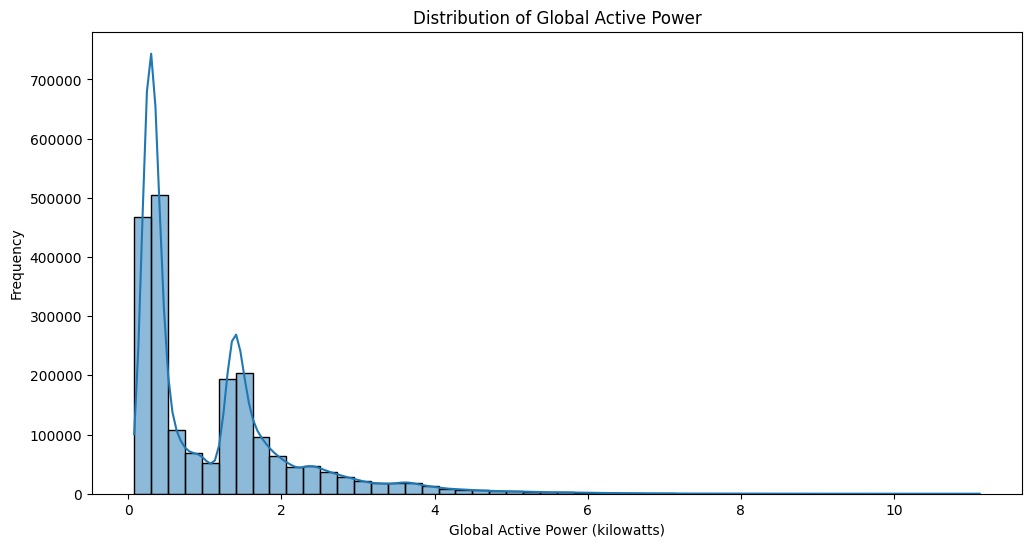

In [22]:
# 1. Distribution of 'Global_active_power'
plt.figure(figsize=(12, 6))
sns.histplot(df['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.show()

**Observation :**

1.Values above 2 kilowatts are less frequent, and values above 6 kilowatts are very rare. This could imply that high power consumption is either uncommon or occurs only under specific conditions.

2.There is a significant peak around 0.2–0.4 kilowatts, indicating that the most frequent usage level falls within this range. This suggests that low levels of active power are common in this dataset

**Question 2**

What is the nature of the relationship between 'Global_active_power' and 'Voltage'?

When comparing 'Global_active_power' to 'Voltage', do we see a correlation or any distinctive relationship between the two variables? Does one seem to increase or decrease in response to the other, or are they relatively independent?

<ipython-input-23-09078df502ce>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Voltage_range')['Global_active_power'].mean().plot(kind='bar', color='skyblue')


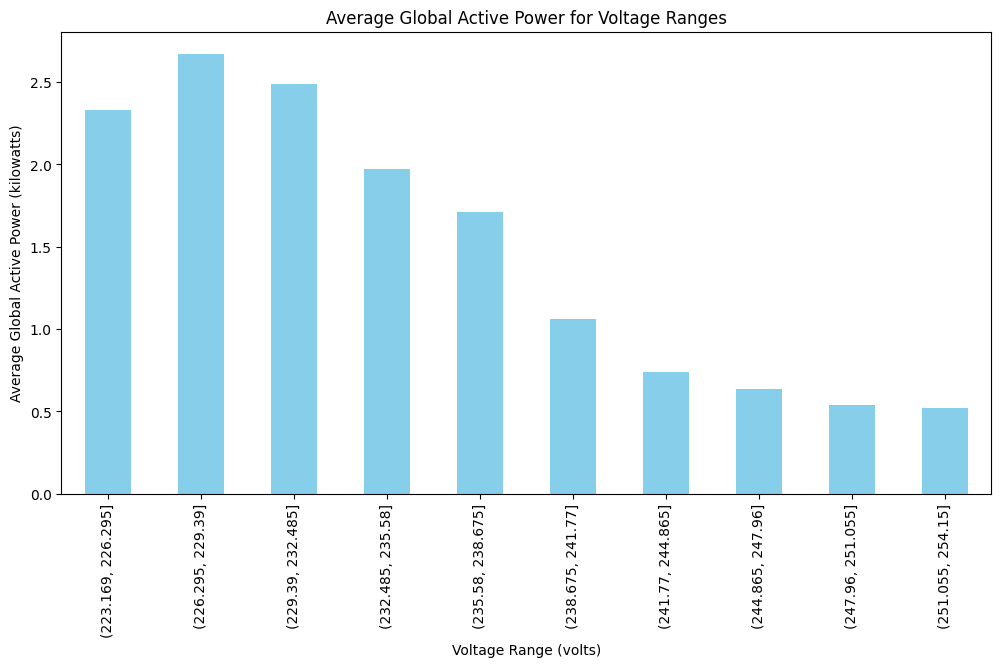

In [23]:
# Bar chart of 'Global_active_power' grouped by 'Voltage' ranges
df['Voltage_range'] = pd.cut(df['Voltage'], bins=10)  # Group voltage into bins
plt.figure(figsize=(12, 6))
df.groupby('Voltage_range')['Global_active_power'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Global Active Power for Voltage Ranges')
plt.xlabel('Voltage Range (volts)')
plt.ylabel('Average Global Active Power (kilowatts)')
plt.show()

**Observation**

1.The voltage ranges from around 223.169 to 232.485 volts show the highest levels of average Global Active Power, with values above 2 kilowatts. This suggests that lower voltages are associated with higher power draw.

2.The chart reveals a general trend where the average Global Active Power decreases as the voltage range increases. In lower voltage ranges the average Global Active Power is higher, while in higher voltage ranges the average power consumption is lower.

**Question 3:**

How does 'Global_intensity' fluctuate across different hours of the day?

Observing the values of 'Global_intensity' over the course of a day, are there specific hours where it tends to peak or drop? Are there identifiable periods of high or low intensity that could suggest daily consumption patterns?

<ipython-input-24-bf167462ad1e>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


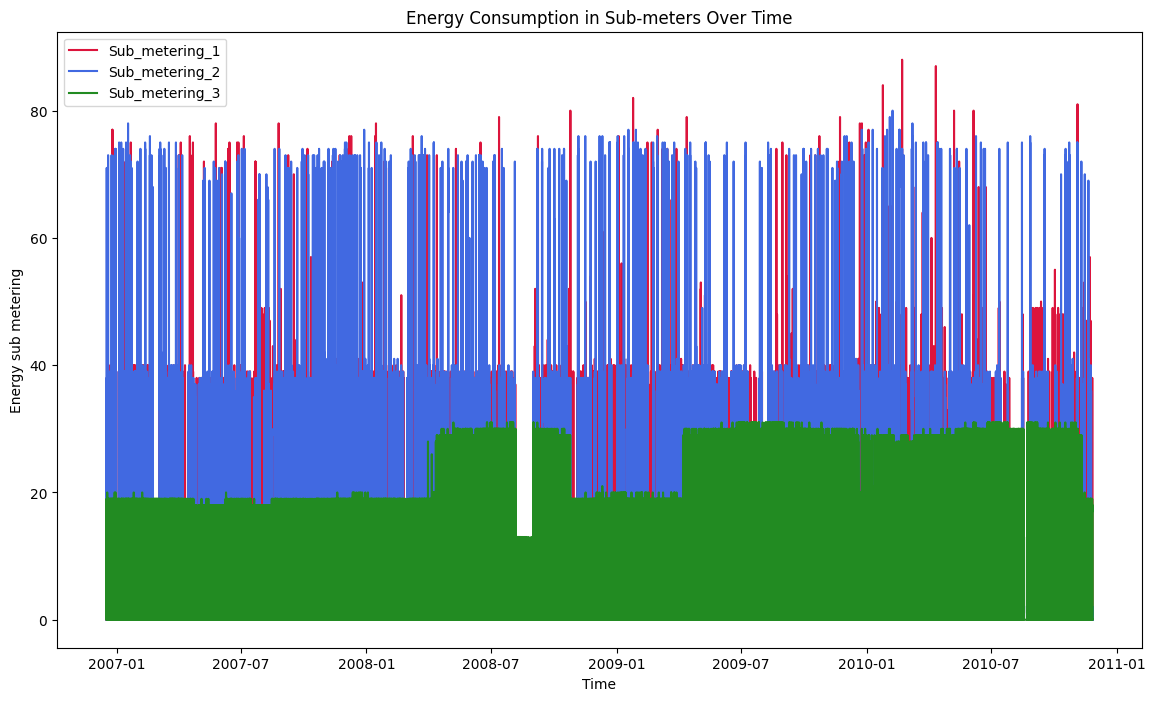

In [24]:
plt.figure(figsize=(14, 8))
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
plt.plot(df['Datetime'], df['Sub_metering_1'], label='Sub_metering_1', color='crimson')
plt.plot(df['Datetime'], df['Sub_metering_2'], label='Sub_metering_2', color='royalblue')
plt.plot(df['Datetime'], df['Sub_metering_3'], label='Sub_metering_3', color='forestgreen')
plt.title('Energy Consumption in Sub-meters Over Time')
plt.xlabel('Time')
plt.ylabel('Energy sub metering')
plt.legend()
plt.show()


**Observation:**

1.There is a high frequency of energy usage fluctuations, with frequent spikes across all sub-meters. This indicates intermittent or possibly highly variable energy consumption.

2.Sub_metering_1 and Sub_metering_2 seem to show a similar pattern of high-frequency fluctuations.

3.Sub_metering_3 shows fewer spikes, with more consistent values over time.

**Question:**

What is the average 'Sub_metering' value on a daily basis?

Calculating the average values of each 'Sub_metering' measurement per day, what does the data reveal about typical daily consumption? Are there variations in these averages that suggest certain days have higher or lower metered consumption?

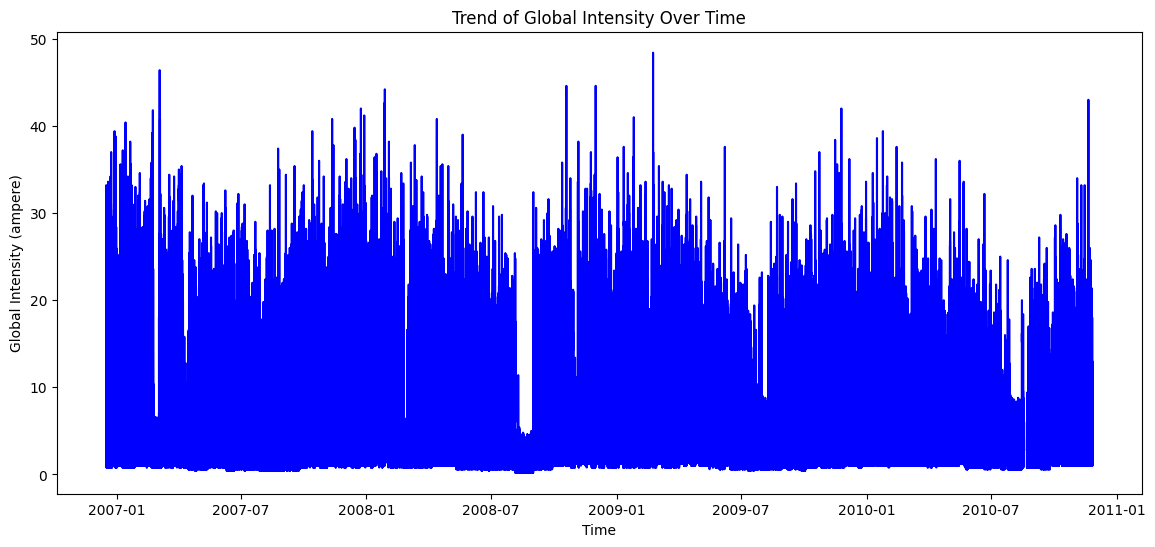

In [25]:
plt.figure(figsize=(14, 6))
plt.plot(df['Datetime'], df['Global_intensity'], color='blue')
plt.title('Trend of Global Intensity Over Time')
plt.xlabel('Time')
plt.ylabel('Global Intensity (ampere)')
plt.show()

**Observation**

1.The global intensity fluctuates significantly throughout the timeframe, showing a pattern of peaks and troughs.

2.There seem to be periodic spikes, possibly corresponding to seasonal changes or other recurring events that increase global intensity.

3.Although there is high variability, there may be a cyclic or seasonal trend to the pattern, with the frequency of peaks and valleys potentially following a regular cycle.

#Pair plot for selected columns to observe correlations

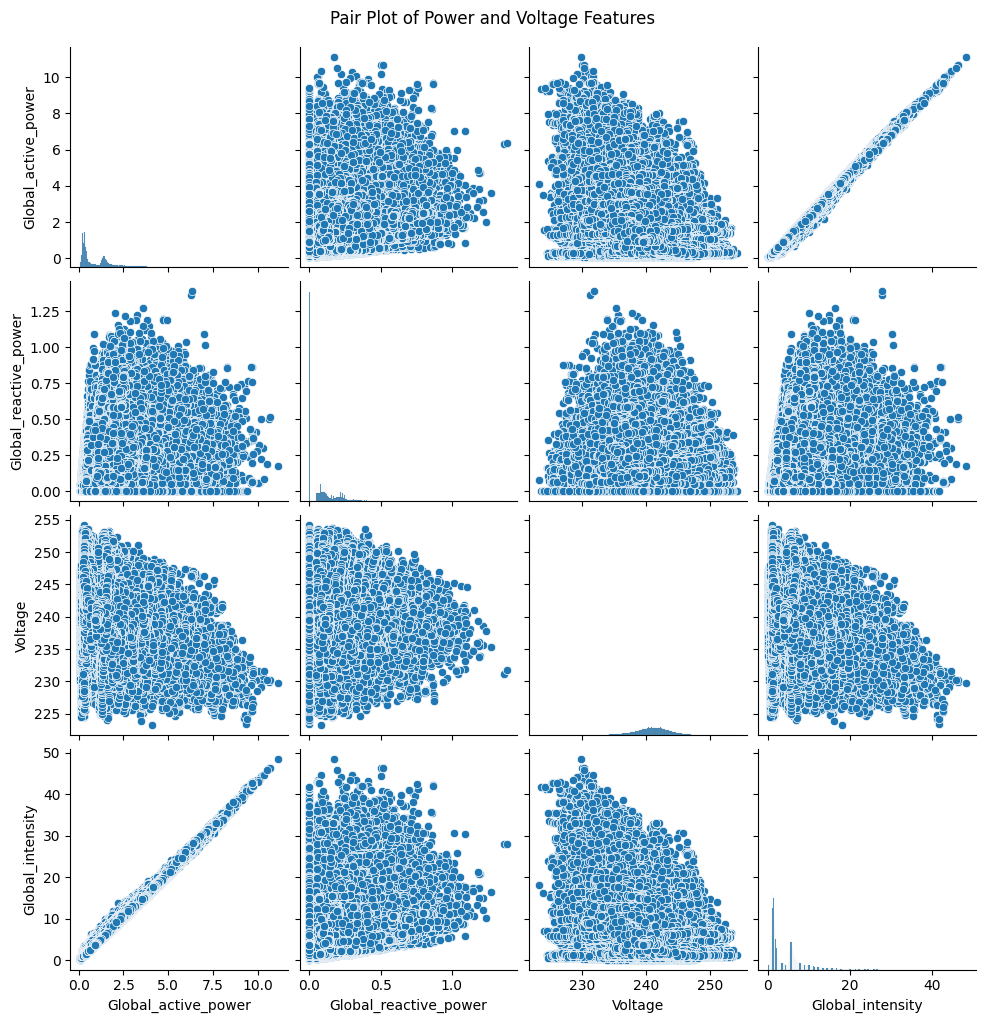

In [26]:
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
sns.pairplot(df[cols].dropna())
plt.suptitle('Pair Plot of Power and Voltage Features', y=1.02)
plt.show()

**Question**

How does 'Global_reactive_power' differ on holidays compared to regular days?

**Step 1:**
Extract date and time components into tuples

In [27]:
df['Date'] = df['Datetime'].apply(lambda dt: (dt.year, dt.month, dt.day))
df['Time'] = df['Datetime'].apply(lambda dt: (dt.hour, dt.minute))

check the output

In [28]:

print(df[['Datetime', 'Date', 'Time']].head())

             Datetime            Date      Time
0 2006-12-16 17:24:00  (2006, 12, 16)  (17, 24)
1 2006-12-16 17:25:00  (2006, 12, 16)  (17, 25)
2 2006-12-16 17:26:00  (2006, 12, 16)  (17, 26)
3 2006-12-16 17:27:00  (2006, 12, 16)  (17, 27)
4 2006-12-16 17:28:00  (2006, 12, 16)  (17, 28)


In [29]:
print(df[['Datetime', 'Date', 'Time']].tail())

                   Datetime            Date      Time
2075254 2010-11-26 20:58:00  (2010, 11, 26)  (20, 58)
2075255 2010-11-26 20:59:00  (2010, 11, 26)  (20, 59)
2075256 2010-11-26 21:00:00  (2010, 11, 26)   (21, 0)
2075257 2010-11-26 21:01:00  (2010, 11, 26)   (21, 1)
2075258 2010-11-26 21:02:00  (2010, 11, 26)   (21, 2)


**Step 2:**
Install The holidays library

In [30]:
!pip install holidays

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.5 MB/s eta 0:00:00


**Step 3:**
Finding if the days are holidays or not

#(0 = not holiday, 1= holiday)

In [31]:
import holidays
from datetime import date
holiday_list = holidays.India(years=[2006, 2007, 2008, 2009, 2010])

def check_if_holiday(date_tuple):
    holiday_date = date(*date_tuple)
    return 1 if holiday_date in holiday_list else 0

df['Holiday'] = df['Date'].apply(lambda x: check_if_holiday((x[0], x[1], x[2])))
print(df[['Datetime', 'Date', 'Holiday']])

                   Datetime            Date  Holiday
0       2006-12-16 17:24:00  (2006, 12, 16)        0
1       2006-12-16 17:25:00  (2006, 12, 16)        0
2       2006-12-16 17:26:00  (2006, 12, 16)        0
3       2006-12-16 17:27:00  (2006, 12, 16)        0
4       2006-12-16 17:28:00  (2006, 12, 16)        0
...                     ...             ...      ...
2075254 2010-11-26 20:58:00  (2010, 11, 26)        0
2075255 2010-11-26 20:59:00  (2010, 11, 26)        0
2075256 2010-11-26 21:00:00  (2010, 11, 26)        0
2075257 2010-11-26 21:01:00  (2010, 11, 26)        0
2075258 2010-11-26 21:02:00  (2010, 11, 26)        0

[2075259 rows x 3 columns]


In [32]:
holiday_counts = df['Holiday'].value_counts()
print("Holiday counts:")
print(f"Holiday (1): {holiday_counts.get(1, 0)}")
print(f"Non-Holiday (0): {holiday_counts.get(0, 0)}")

Holiday counts:
Holiday (1): 105120
Non-Holiday (0): 1970139


There are 105120 Holidays
and 1970139 non Holidays

Find if the there is sunlight during the time given in the dataset
# ( 0600-1800 hours ---1 (light is there) else 0)

In [33]:
def check_sunlight(time):
    hour = time[0]
    return 1 if 6 <= hour < 18 else 0
df['Sunlight'] = df['Time'].apply(check_sunlight)
print(df[['Datetime', 'Time', 'Sunlight']].head())

             Datetime      Time  Sunlight
0 2006-12-16 17:24:00  (17, 24)         1
1 2006-12-16 17:25:00  (17, 25)         1
2 2006-12-16 17:26:00  (17, 26)         1
3 2006-12-16 17:27:00  (17, 27)         1
4 2006-12-16 17:28:00  (17, 28)         1


In [34]:
print(df[['Datetime', 'Time', 'Sunlight']].tail())

                   Datetime      Time  Sunlight
2075254 2010-11-26 20:58:00  (20, 58)         0
2075255 2010-11-26 20:59:00  (20, 59)         0
2075256 2010-11-26 21:00:00   (21, 0)         0
2075257 2010-11-26 21:01:00   (21, 1)         0
2075258 2010-11-26 21:02:00   (21, 2)         0


Visualizing the new coloumns

<ipython-input-35-773a2abee094>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[0, 1], y=df['Sunlight'].value_counts().sort_index(), palette="Reds_d")


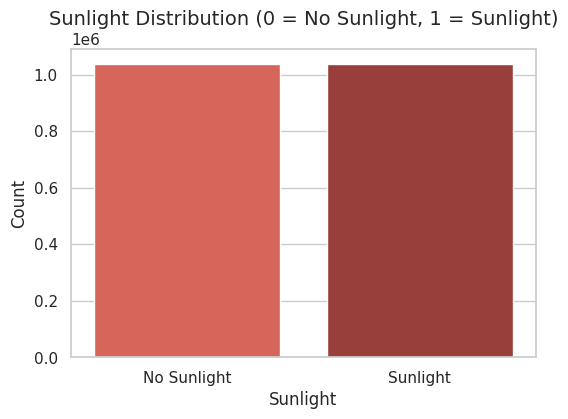

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style
sns.set(style="whitegrid")

# Plot Sunlight Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=[0, 1], y=df['Sunlight'].value_counts().sort_index(), palette="Reds_d")
plt.title('Sunlight Distribution (0 = No Sunlight, 1 = Sunlight)', fontsize=14)
plt.xlabel('Sunlight', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Sunlight', 'Sunlight'])
plt.show()




**observations:**

1.Both "No Sunlight" and "Sunlight" have counts close to each other, with "No Sunlight" having a slightly higher count.

<ipython-input-36-265d7c692c58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[0, 1], y=df['Holiday'].value_counts().sort_index(), palette="Blues_d")


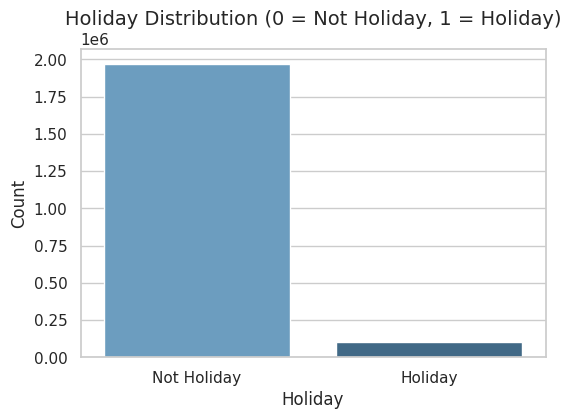

In [36]:
# Plot Holiday Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=[0, 1], y=df['Holiday'].value_counts().sort_index(), palette="Blues_d")
plt.title('Holiday Distribution (0 = Not Holiday, 1 = Holiday)', fontsize=14)
plt.xlabel('Holiday', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Not Holiday', 'Holiday'])
plt.show()

**Observations:**

1.There is a significant imbalance, with "Not Holiday" days far outnumbering "Holiday" days.



#Milestone 3

**Spliting Data**

Training Set: Used to teach the model to recognize patterns in the data.

Testing Set: Evaluates how well the model generalizes to unseen data. Ensures that the model is not overfitting (memorizing) the training data.

In [37]:
from sklearn.model_selection import train_test_split

# Define target variable and features
X = df.drop(['Global_active_power', 'Datetime', 'Date', 'Time', 'Holiday', 'Sunlight'], axis=1)
y = df['Global_active_power']

observation:
Data is converted into train and test sets.

**Handeling categorical coloumns**

In [38]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
X_train = X_train.dropna()
X_test = X_test.dropna()
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

Used one hot encoding

**Comparing Models**

using
1. **The Root Mean Squared Error (RMSE)** is a commonly used metric for evaluating regression models. It measures the average magnitude of the errors between predicted values and actual values.
2. **R^2 score, or Coefficient of Determination**, measures how well the regression model explains the variance in the target variable. It indicates the proportion of the total variation in the target variable that is explained by the model.
3.**Mean Absolute Error (MAE)** is a statistical metric used to measure the average magnitude of the errors in a set of predictions, without considering their direction (positive or negative). It represents how far the predictions are, on average, from the actual values.

In [39]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print("Linear Regression:")
print(f"RMSE: {rmse_linear:.2f}")
print(f"R²: {r2_linear:.2f}")
print(f"MAE: {mae_linear:.2f}")

# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("\nLasso Regression:")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R²: {r2_lasso:.2f}")
print(f"MAE: {mae_lasso:.2f}")

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("\nRidge Regression:")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R²: {r2_ridge:.2f}")
print(f"MAE: {mae_ridge:.2f}")


Linear Regression:
RMSE: 0.04
R²: 1.00
MAE: 0.03

Lasso Regression:
RMSE: 0.05
R²: 1.00
MAE: 0.04

Ridge Regression:
RMSE: 0.04
R²: 1.00
MAE: 0.03


1. **Linear Regression**:

RMSE (0.04): Very low, indicating the model's predictions are very close to the actual values.

R² (1.00): Perfect fit, meaning the model explains all the variance in the data.

MAE (0.03): Also very low, meaning the average error in the predictions is minimal.

2. **Lasso Regression**:

RMSE (0.05): Slightly higher than Linear and Ridge Regression, indicating slightly higher prediction errors.

R² (1.00): Like the others, it perfectly explains the variance in the data.

MAE (0.04): A little higher than Linear and Ridge Regression, indicating slightly larger average prediction errors.

3.**Ridge Regression**:

RMSE (0.04): Like Linear Regression, the RMSE is very low, indicating a high level of accuracy in predictions.

R² (1.00): Perfect fit, meaning it explains all the variance in the data.

MAE (0.03): Like Linear Regression, the MAE is low, indicating minimal average error.

#Observation:
Linear Regression and Ridge Regression perform almost identically, with both having very low RMSE and MAE values. They both make accurate predictions with minimal error.
Lasso Regression has slightly higher RMSE and MAE values, indicating it has slightly more prediction error than the other two models, although the difference is small.

**Comparing RSME , MAE , R^2**

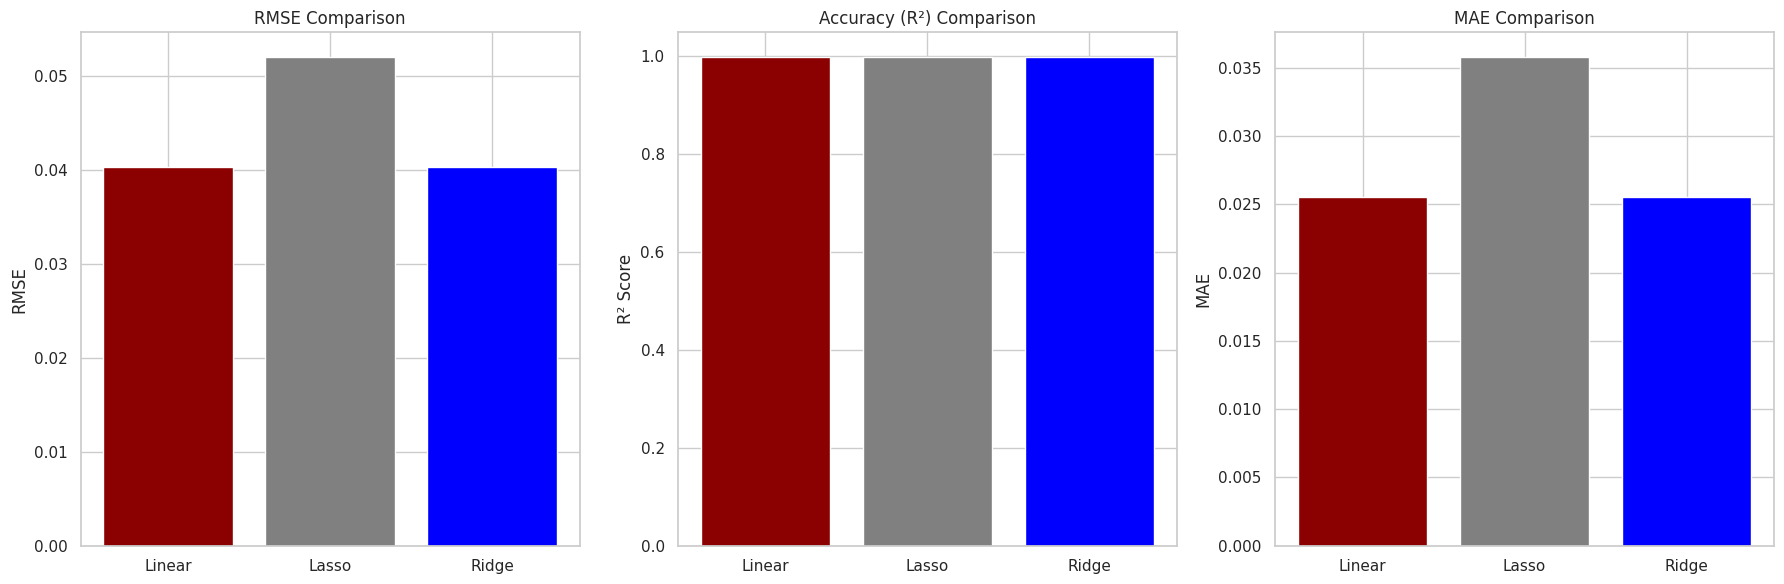

In [40]:
import matplotlib.pyplot as plt

# Plot RMSE, R², and MAE comparison
plt.figure(figsize=(18, 6))

# RMSE Plot
plt.subplot(1, 3, 1)
plt.bar(['Linear', 'Lasso', 'Ridge'], [rmse_linear, rmse_lasso, rmse_ridge], color=['#8B0000', '#808080', '#0000FF'])  # Dark red, Chrome, Blue
plt.ylabel('RMSE')
plt.title('RMSE Comparison')

# R² Plot
plt.subplot(1, 3, 2)
plt.bar(['Linear', 'Lasso', 'Ridge'], [r2_linear, r2_lasso, r2_ridge], color=['#8B0000', '#808080', '#0000FF'])  # Dark red, Chrome, Blue
plt.ylabel('R² Score')
plt.title('Accuracy (R²) Comparison')

# MAE Plot
plt.subplot(1, 3, 3)
plt.bar(['Linear', 'Lasso', 'Ridge'], [mae_linear, mae_lasso, mae_ridge], color=['#8B0000', '#808080', '#0000FF'])  # Dark red, Chrome, Blue
plt.ylabel('MAE')
plt.title('MAE Comparison')

plt.tight_layout()
plt.show()


#Why certain models have good accuracy and others don't?

1. Linear Relationships in Data
Strong Linear Relationships: When the data has a clear, straight-line pattern between the features (inputs) and the target (output), models like Linear Regression, Ridge Regression, and Lasso Regression work really well. These models are simple and easy to use for problems where the data fits a straight line.Since the data is straightforward, these models don’t need to be complex. They can find the relationship without overcomplicating things.


2. Impact of Regularization
Ridge Regression: Ridge adds a penalty to the model for using very large numbers (coefficients). This helps the model stay stable and prevents it from fitting too closely to the training data (overfitting). This can slightly improve the model’s performance.
Lasso Regression: Lasso also adds a penalty, but it can also remove some features entirely by shrinking their coefficients to zero. This helps the model focus on only the most important features, but it might cause a slightly higher error (RMSE) because some useful features might be removed.


3. Low Complexity and High Predictive Power
Low Noise and Good Features: When the data is clean (not too many errors) and the features are really useful for predicting the target, linear models can give accurate results without needing complex approaches.
Predicting Accurately: These simple models work well because they focus on the most important patterns in the data and avoid overfitting (making the model too specific to the training data).

Linear Regression works best when the data has a simple, straight-line relationship and is not too noisy.

Ridge Regression helps when there are a lot of features and prevents the model from getting too complex by penalizing large numbers.

Lasso Regression is similar to Ridge, but it can remove unimportant features, making the model simpler, though sometimes it can result in a bit more error (RMSE).

#Milestone 4

ARIMA (AutoRegressive Integrated Moving Average) is a popular time series forecasting technique combining three key components:

AR (AutoRegressive): Predicts values based on a linear combination of past observations.

Parameter:
𝑝
 (number of past observations to include).
I (Integrated): Makes the series stationary by differencing, removing trends or seasonality.

Parameter:
𝑑
 (number of differencing operations).
MA (Moving Average): Models the error term as a linear combination of past forecast errors.

Parameter:

q (number of lagged errors to consider).

In [41]:
!pip install statsmodels
# Import the necessary library and class
from statsmodels.tsa.arima.model import ARIMA

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 13.6 MB/s eta 0:00:00


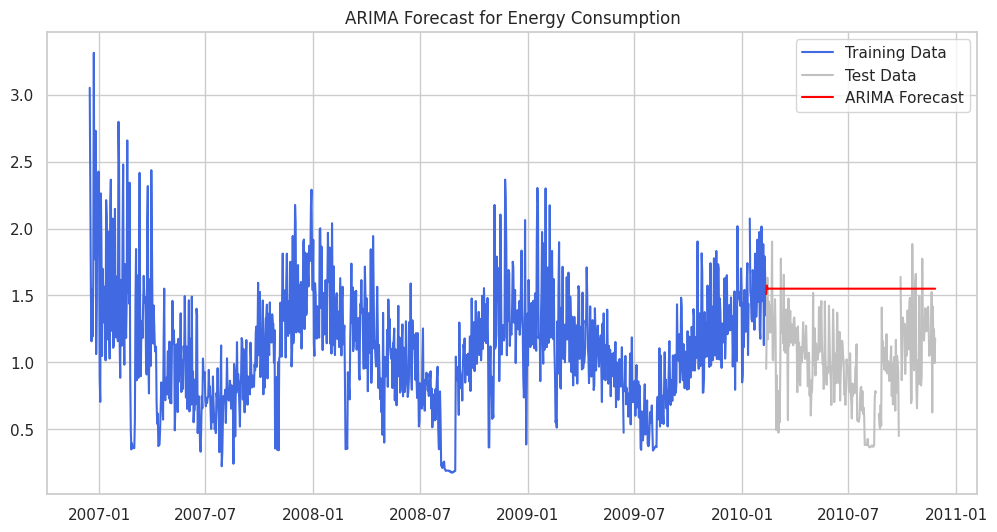

In [43]:
import matplotlib.pyplot as plt

daily_power = df.resample('D', on='Datetime')['Global_active_power'].mean()

train_size = int(len(daily_power) * 0.8)
train, test = daily_power[:train_size], daily_power[train_size:]

arima_model = ARIMA(train, order=(2, 1, 2))
arima_fit = arima_model.fit()


forecast = arima_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(train, label="Training Data", color ="royalblue")
plt.plot(test, label="Test Data", color="silver")
plt.plot(test.index, forecast, label="ARIMA Forecast", color="red")
plt.legend()
plt.title("ARIMA Forecast for Energy Consumption")
plt.show()

**Mathematics Behind ARIMA model**



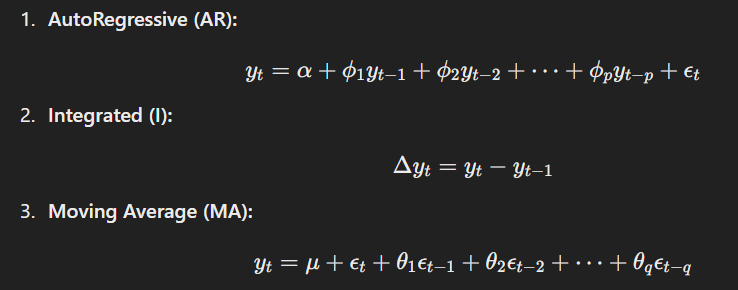

**Observation**
ARIMA is a robust and versatile time series forecasting method that combines the strengths of AutoRegression (AR), Integration (I), and Moving Average (MA) to capture patterns in stationary data. It is especially effective for time series that become stationary after differencing, allowing it to model both long-term dependencies (using AR) and short-term variations or noise (using MA).

#**Energy Consumption Forecasting with Prophet**

Prophet is a time series forecasting tool developed by Facebook, suitable for data with strong trends and seasonality.

Trend

Linear Growth: Models a steady increase or decrease in data over time.


Logistic Growth: Models saturation points where growth slows as it approaches a cap.
Formula:


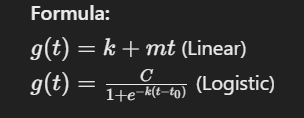

Seasonality

Captures repeating patterns in the data, such as daily, weekly, or yearly cycles.
Additive or multiplicative seasonal effects.

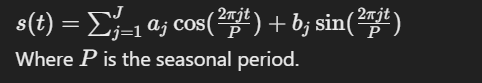

**Final model**

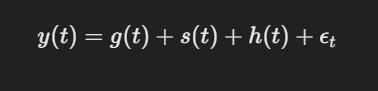



g(t): Trend component.


s(t): Seasonality component.

h(t): Holiday effects.

ϵ
t
​
 : Error term.

In [44]:
!python -m pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.7 MB/s eta 0:00:00


DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6eysh3o/c54z8oxf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6eysh3o/q5s5dihw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48294', 'data', 'file=/tmp/tmpc6eysh3o/c54z8oxf.json', 'init=/tmp/tmpc6eysh3o/q5s5dihw.json', 'output', 'file=/tmp/tmpc6eysh3o/prophet_modelekgyw0d3/prophet_model-20241125152726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:27:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:51:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

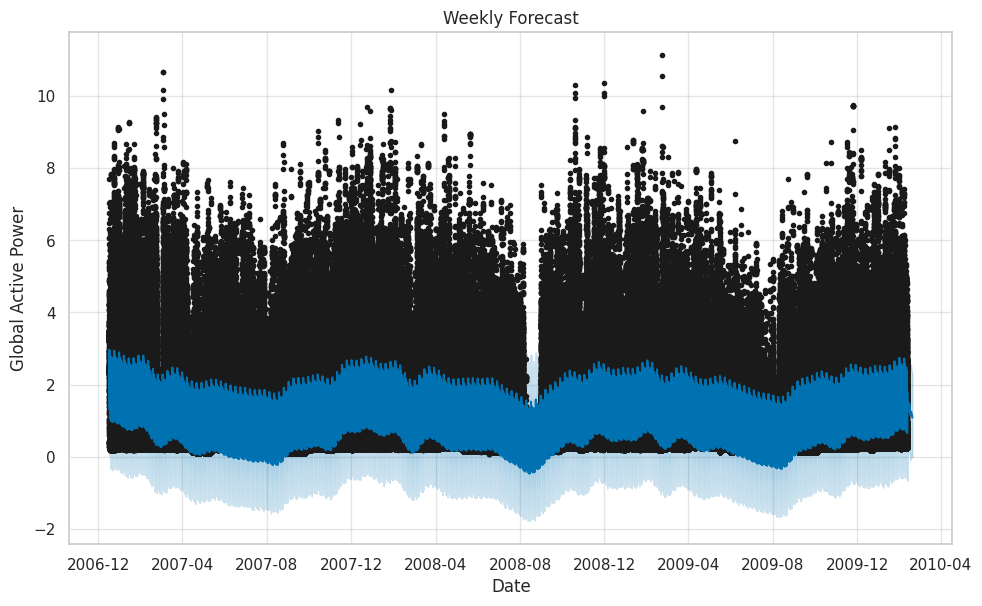

<Figure size 1000x600 with 0 Axes>

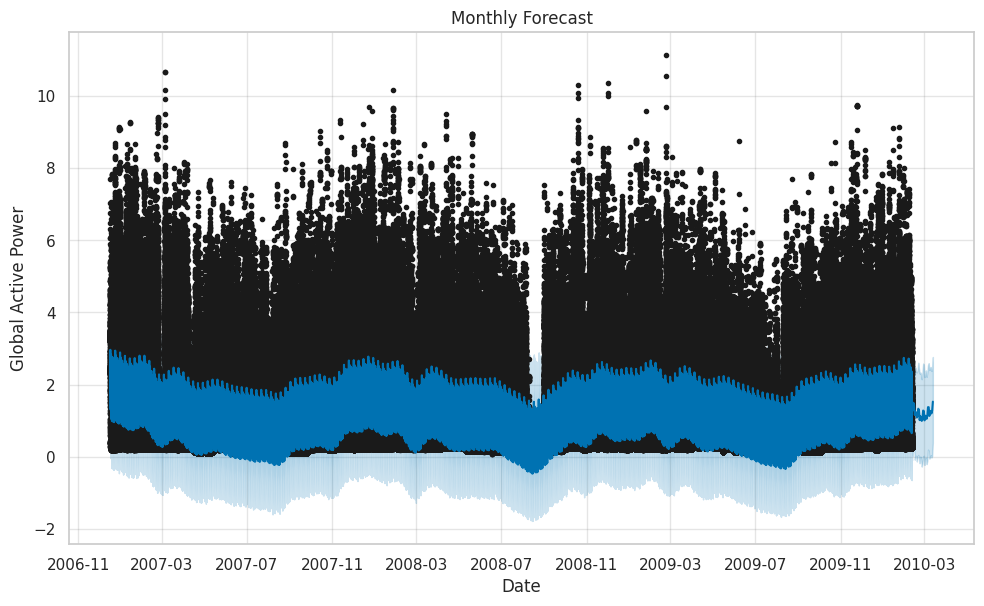

<Figure size 1000x600 with 0 Axes>

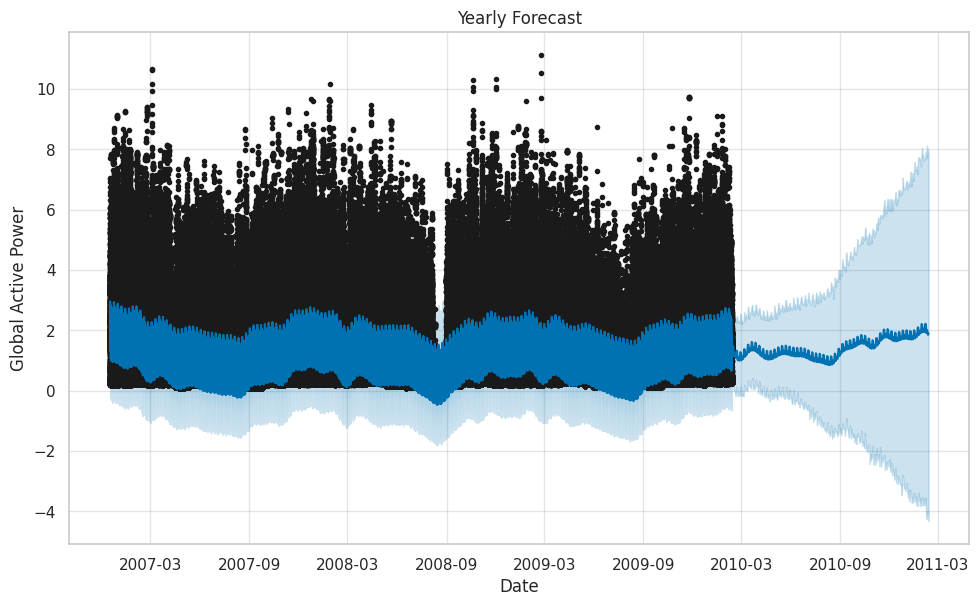

In [45]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

prophet_df = df[['Datetime', 'Global_active_power']].rename(columns={'Datetime': 'ds', 'Global_active_power': 'y'})

# Split data into training and testing sets (80%-20% split)
train_size = int(len(prophet_df) * 0.8)
train_df = prophet_df[:train_size]
test_df = prophet_df[train_size:]


model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)


model.fit(train_df)


future_dates_weekly = model.make_future_dataframe(periods=7, freq='D')  # 7-day forecast
predictions_weekly = model.predict(future_dates_weekly)


future_dates_monthly = model.make_future_dataframe(periods=30, freq='D')  # 30-day forecast
predictions_monthly = model.predict(future_dates_monthly)


future_dates_yearly = model.make_future_dataframe(periods=365, freq='D')  # 1-year forecast
predictions_yearly = model.predict(future_dates_yearly)


# Weekly Forecast
plt.figure(figsize=(10, 6))
model.plot(predictions_weekly)
plt.title("Weekly Forecast")
plt.xlabel("Date")
plt.ylabel("Global Active Power")
plt.show()

# Monthly Forecast
plt.figure(figsize=(10, 6))
model.plot(predictions_monthly)
plt.title("Monthly Forecast")
plt.xlabel("Date")
plt.ylabel("Global Active Power")
plt.show()

# Yearly Forecast
plt.figure(figsize=(10, 6))
model.plot(predictions_yearly)
plt.title("Yearly Forecast")
plt.xlabel("Date")
plt.ylabel("Global Active Power")
plt.show()

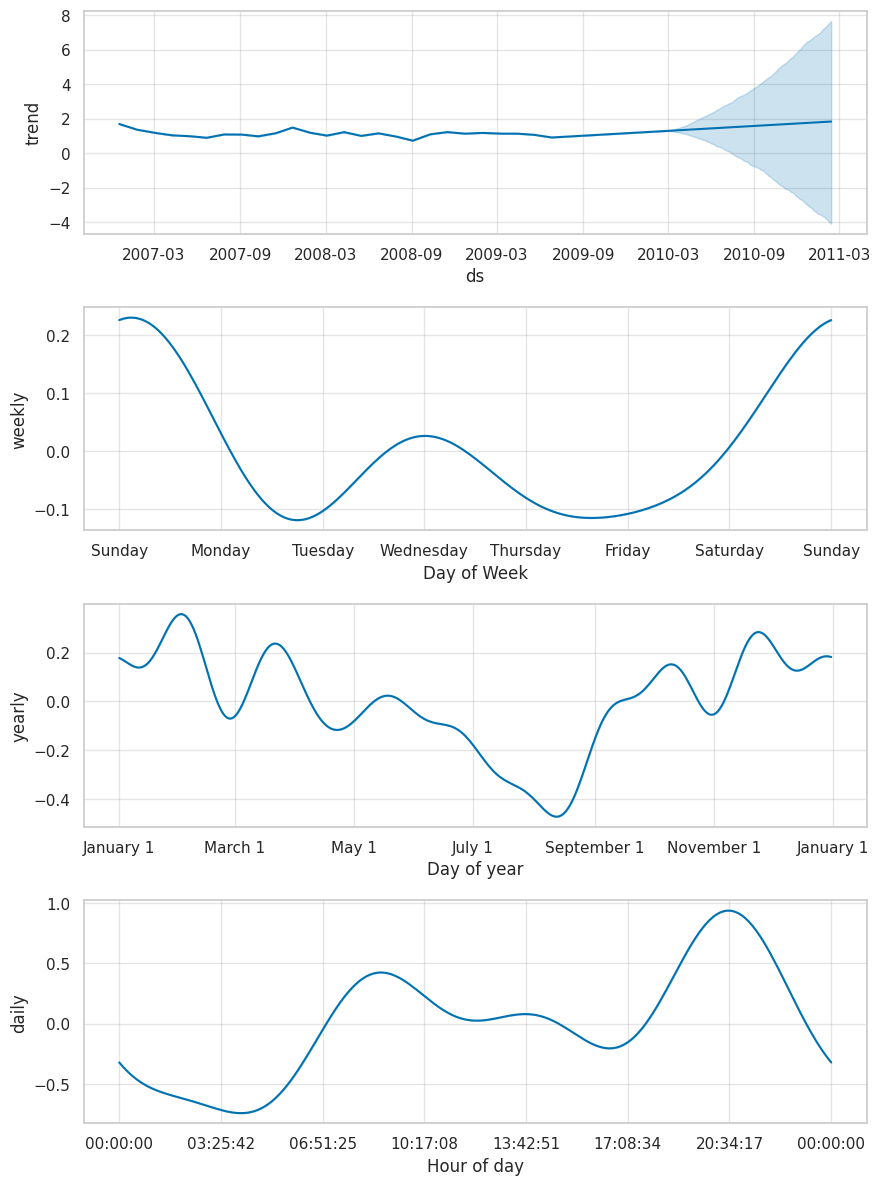

In [46]:

model.plot_components(predictions_yearly)
plt.show()



### Observation:

**Trend:** Reflects consistent changes over time, indicating either growth or decline in the system's behavior. For example, in energy forecasting, a trend may signal an increase in energy demand due to population growth or infrastructure development.

**Seasonality:**
- **Yearly:** Highlights recurring energy consumption patterns across years, often due to seasonal climate changes or annual events.  
- **Daily:** Captures diurnal variations in energy usage, influenced by human activities (e.g., peak usage during daytime).